# GITC22 Driller

## Team: 3SGT


*License: [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/)*



Reference: https://github.com/GeoML-SIG/wildcatter

## Introduction
1) Overview of the Reinforcement Learning system for this project<br>
2) Key items implemented<br>
3) Code review<br>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

## Agent: the driller is the agent that interacts with the environment in this project

## Environment: the environment includes 
1) the State (boolean model of the well trajectory)<br>
2) the Action (moving up, down, left, and right)<br>
3) the Reward (positive or negative rewards depend upon the earth model in this project) 
  

##  Reward System Logic: 

#### 1) The first two production wells: 
1.1 earth model has reservoir (oil, gas bearing zones, with positive reward values, to encourage the driller to find "sweet spots")<br>
1.2 earth model has hazardous areas (shallow hazard, faults, extremely HTHP zones at bottom of model, with negative reward values, to discourage the driller from contact)<br>
1.3 the purpose of the driller is to maximize the total reward.  


#### 2) The injection well: given the existing production wells, the injection well  avoids production zones 
2.1 in order not to interfere with production, the driller is discouraged to encounter oil and gas "sweet spots"; reward is implemented via the earth model where zones at the 'sweet spots' have negative values<br>
2.2 injection well is encouraged to be close to the production zones to provide pressure lift<br> 
2.3 earth model also has hazardous zones  



## Gym Agent and Environment

We created a modified Environment based on OpenAI's Gym interface. This is contained within Wildcatter's `environment` module.

### Things to Know
1. The observation of the model state is the borehole trajectory, production or reservoir will be considered.
2. Surface hole location is randomly selected at each environment reset.
3. Collision logic is implemented in three ways:
    3.1. Drilling over if agent hits East or West boundaries.
    3.2. Drilling over if agent hits North (surface) or South boundaries.
    3.3. Drilling over if borehole collides with itself.

The action space consists of four discrete actions:

Action Space:

| Num | Action         |
|:---:|----------------|
|  0  | Move bit down  |
|  1  | Move bit left  |
|  2  | Move bit right |
|  3  | Move bit up    |

The Observation Space:

It is a Box observation space with 40 rows and 80 columns.
Data type is `bool` and it will be True where the well trajectory is.
The RL algorithm will see the full trajectory as the state.

`bit_location = [row, col] = [depth, surface_loc]`

`trajectory = [[row1, col1], [row2, col2], ..., [rowN, colN]]`

All reward models are created using tiled, here is the download link [here](https://www.mapeditor.org/).

# Multiple wells drilling with geological and economic constrains

The following items were taken into consideration

1) Prevent fault contact 

2) Prevent 180-degree turns of the drill string 

3) Drill multiple wells 

4) Generate more than one additional environment 

5) Optimize field development based on economic constraints 

6) Reservoir depletion mechanics

Addtional thoughts:
1) horizontal well

2) bitcoin mining

3) geothermal energy haversting



###  Fault contact prevention:
     Drilling over if agent hits Faults, Shallow harzards and HTHP zones.
       Implementation in the source code (environment python source file): 
       elif  (  self.model[newrow, newcol] == -100 ) :  
            done = True
            reward = -100
### Prevent 180-degree turns of the drill string:
    The previous actions are recorded and checked to prevent the next action in the opposite direction  
       *** avoid 180 degree turn (0:down vs 3:up; and 1:left vs 2:right) *** 
       # each time reset, need to set well_actions to [] 
       elif (  (3-action) in  self.well_actions[:-1]  ): 
            done = True
            reward = -100
### Drill multiple wells
    Two production wells and one injection well are drilled as seen in the notebook
      Implementation for avoiding multiple well collision:
      elif ( self.bit_location in self.exist_well_path   ) 
            done = True
            reward = -100
### Generate more than one additional environment
      Implementation of the environment for the second well and the injection well (the surface borhole location and the trajectory of the previous wells are considered)
      env_config = dict(model_path=r"data/2d_stacked_modify6.csv",
                  exist_well_path=r"wellA.csv",
                  available_pipe=npipe,
                  surf_x_start= wellB_x_start,
                  surf_x_end=  wellB_x_end,
                  delim=",")       
### Optimize field development based on economic constraints
     Economic constrains include
         1) Limited number of pipes for both wells
         2) Limited budget for each well:
            Implemented in the source code (environment python source file):
         if self.budget_used >= self.available_budget: # economic constraint 
            done = True 
            reward = 0 

### Reservoir depletion mechanics 

Pressure drops due to production of hydrocarbon; it will be critical to provide pressure lift.

In our project, we designed injection well to provide pressure lift for efficient production of the two production wells. 

We procedurally generate models of geological settings with reward values appropriate for injection well path optimization purpose.

Please refer to the later part of this notebook for more details of the injection well. 
 

#### For production wells: 

We add shallow hazardous zones, extremely HTHP zone at the bottom of the earth model, and faults, where the reward values are set to be negative.    


#### For injection well :

The injection well path optimization schemes include: 

for the space immediately at the oil and gas bearing zones, the reward values are set to be neagative to discourage the injection well from interfering with production. 

for the space being adjacent but not interfering with the oil and gas bearing zones, the reward values are positive to encourage injection well placement.


### Other thoughts
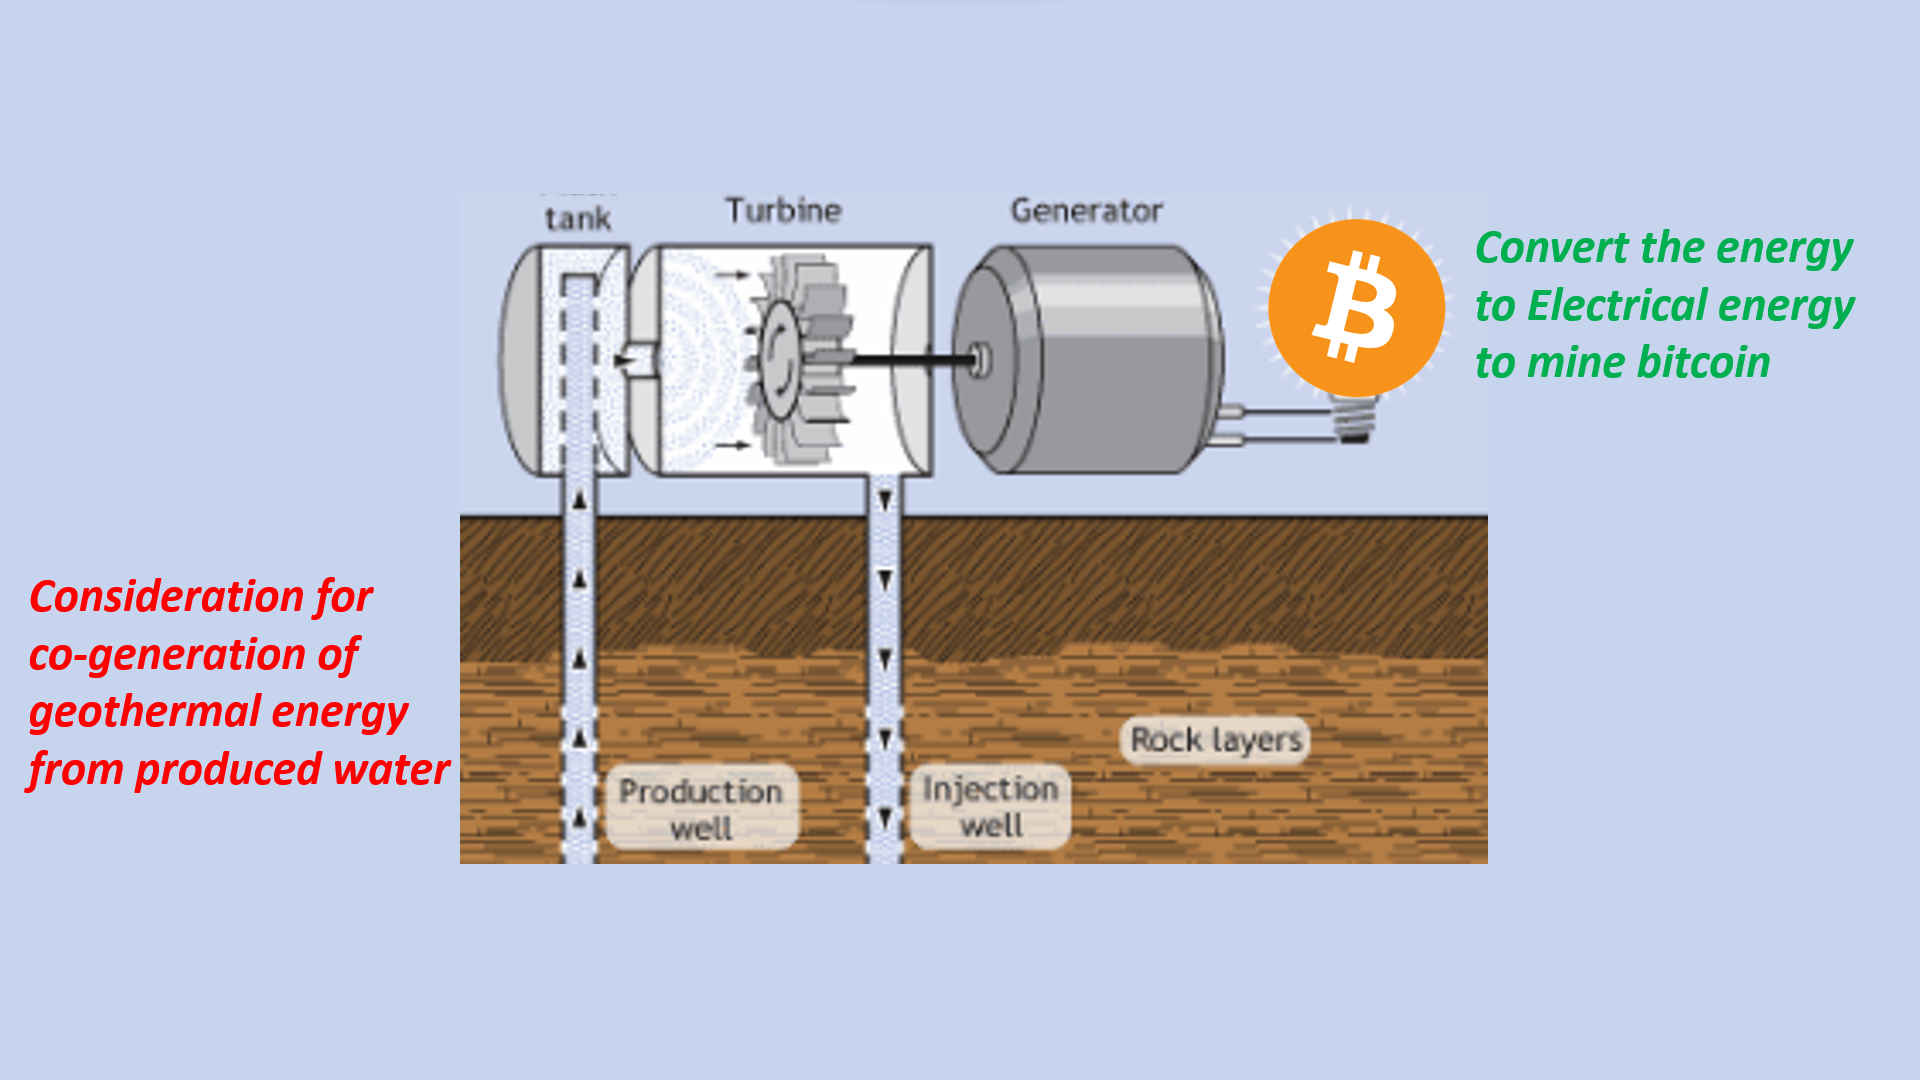

## Without training, drill stops after a few steps 

### Here we set the environment and initialize drilling without training

Exist_well_path first points:
 []
Exist_well_path last points:
 []

available piples: 60 


available budget: 1000

user input, surf_x_start:  55
user input, surf_x_end:  70

within earth model, surf_x_start:  55
within earth model, surf_x_end:  70


self.production : 0 
self.cost_model[:, 2]:  [16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 17. 17. 17. 17. 17.
 17. 17. 17. 17. 17. 17. 17. 17. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18.
 18. 18. 18. 18.]

earth model shape (nz, nx): (40, 80) 

Beginning Drill Campaign: 1


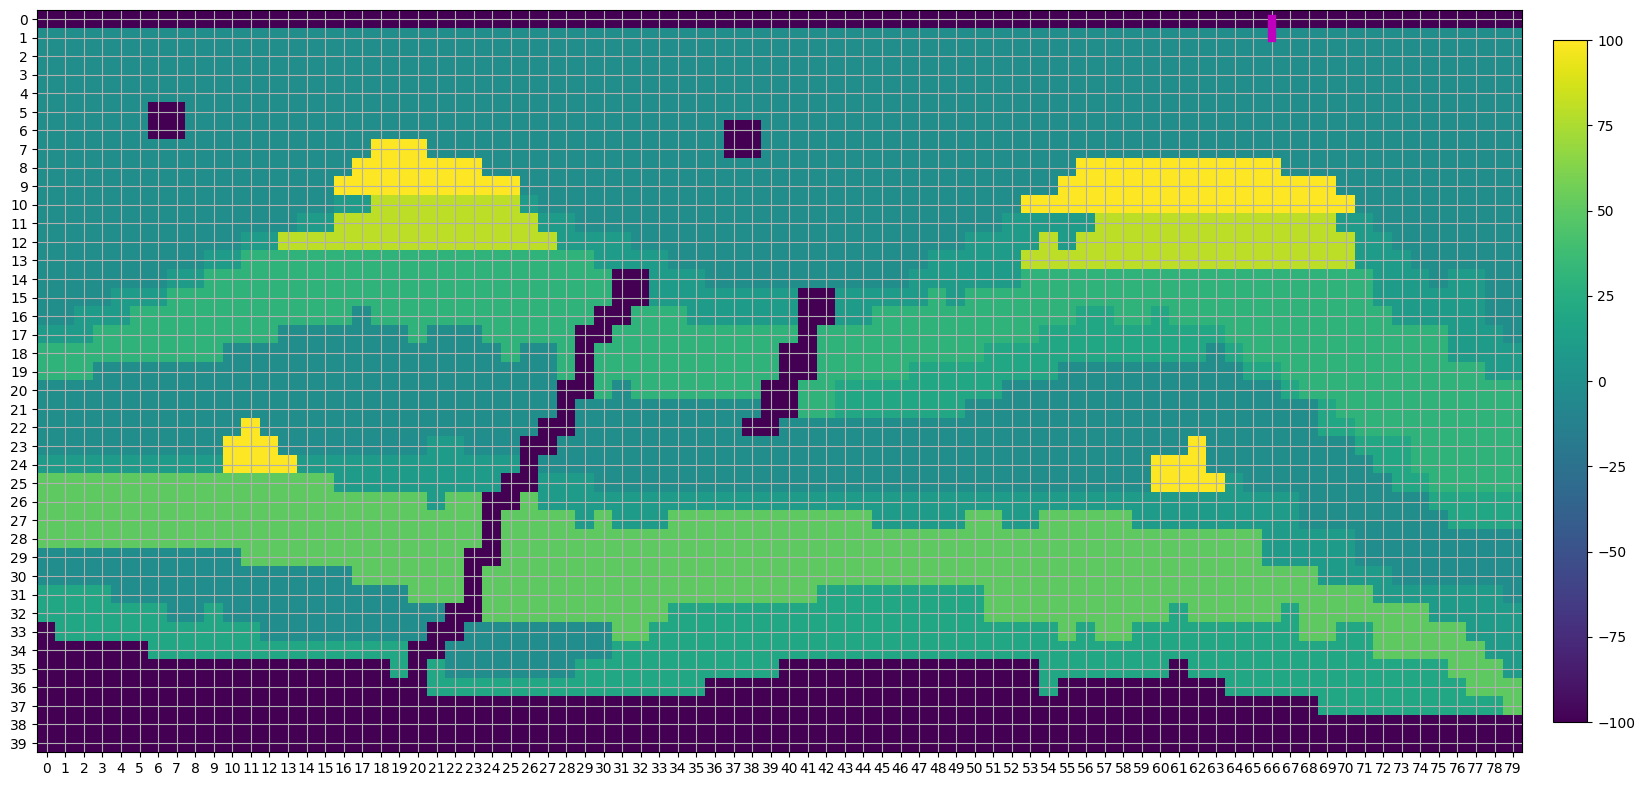

In [7]:
# after modifying environment py file 
# when re-run the notebook, remember to [Kernel] -> [Restart]
# otherwise notebook kernel will use 'old' environment py file 

from wildcatter.environment_modify_multiW_surfaceXrange3 import ModifiedDriller

# number of pipes 
npipe = 60 

prod = 0  # production setting, 0. 

# drilling budge (in thousand US Dollars)
drill_budget = 1000  # 1 million dollars for first well 

env_config = dict(model_path=r"data/2d_stacked_modify6.csv",\
                  exist_well_path="no",\
                  available_pipe=npipe, \
                  available_budget = drill_budget, \
                  production= prod, \
                  surf_x_start= 55, \
                  surf_x_end= 70, \
                  delim=",")

env = ModifiedDriller(env_config)


####### 

earth_model = np.loadtxt(
            env_config["model_path"],
            delimiter=env_config["delim"],
        )
print('\nearth model shape (nz, nx):', earth_model.shape, '\n'  )



#######

episodes = 1
for episode in range(1, episodes + 1):
    print("Beginning Drill Campaign:", episode)
    state = env.reset()
    done = False
    score = 0

    while not done:
        action = env.action_space.sample()
        state, reward, done, info = env.step(action)
        score += reward

# This comes in as [[row1, col1], ..., [rowN, colN]]
# Once we unpack it its z, then x.
traj_z, traj_x = np.asarray(env.trajectory).T

plt.figure(figsize=(20, 20))
#plt.imshow(env.model, vmin=-10, vmax=2)
#im=plt.imshow(env.model, vmin=-10, vmax=2)
im=plt.imshow(env.model , vmin=-100, vmax=100)

plt.plot(traj_x, traj_z, "-", c="m", linewidth=6)
plt.xticks(np.arange(0, 80, 1.0))
plt.yticks(np.arange(0, 40, 1.0))
plt.xlim([-0.5, 79.5])
plt.ylim([39.5, -0.5])

#plt.colorbar( )
plt.colorbar(im, fraction=0.022, pad=0.02)

plt.grid()

## PPO Agent Training

Here we will import Proximal Policy Optimization (PPO) algorithm from Stable Baselines3 and train the model.


In [3]:
from datetime import datetime

# 
# https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html
#
# model.learn(total_timesteps=25000)
# model.save("ppo_cartpole")


from stable_baselines3 import PPO

model = PPO("MlpPolicy", env, verbose=1, learning_rate=0.0003) 

ntimesteps = 400000 #400000  

now = datetime.now()
print('\ntime stamp, before training:', now)

model.learn(total_timesteps= ntimesteps, log_interval=10)  

now = datetime.now()
print('\ntime stamp, after training:', now)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.

time stamp, before training: 2022-09-06 13:32:17.823559
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 19.6        |
|    ep_rew_mean          | 299         |
| time/                   |             |
|    fps                  | 2090        |
|    iterations           | 10          |
|    time_elapsed         | 9           |
|    total_timesteps      | 20480       |
| train/                  |             |
|    approx_kl            | 0.002634836 |
|    clip_fraction        | 0.026       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.576      |
|    explained_variance   | 0.102       |
|    learning_rate        | 0.0003      |
|    loss                 | 4.59e+04    |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.00809    |
|    value_loss           | 7.92e+04    |
---------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 40.6        |
|    ep_rew_mean          | 1.03e+03    |
| time/                   |             |
|    fps                  | 1861        |
|    iterations           | 100         |
|    time_elapsed         | 110         |
|    total_timesteps      | 204800      |
| train/                  |             |
|    approx_kl            | 0.004286406 |
|    clip_fraction        | 0.0224      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.453      |
|    explained_variance   | 0.71        |
|    learning_rate        | 0.0003      |
|    loss                 | 3.41e+04    |
|    n_updates            | 990         |
|    policy_gradient_loss | -0.00834    |
|    value_loss           | 3.71e+04    |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 40.2


time stamp, after training: 2022-09-06 13:35:45.656156


In [8]:
model.save("model_for_wellA")

Once learning is complete, we can use the model to generate a new trajectory to maximize reward.



###  Find the path for the 1st production well A using the trained model "model_for_wellA"


Exist_well_path first points:
 []
Exist_well_path last points:
 []

available piples: 60 


available budget: 1000

user input, surf_x_start:  55
user input, surf_x_end:  70

within earth model, surf_x_start:  55
within earth model, surf_x_end:  70


self.production : 0 
self.cost_model[:, 2]:  [16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 17. 17. 17. 17. 17.
 17. 17. 17. 17. 17. 17. 17. 17. 18. 18. 18. 18. 18. 18. 18. 18. 18. 18.
 18. 18. 18. 18.]
Beginning Drill Campaign: 41
score 2378.0
drill bit finish location reward -100


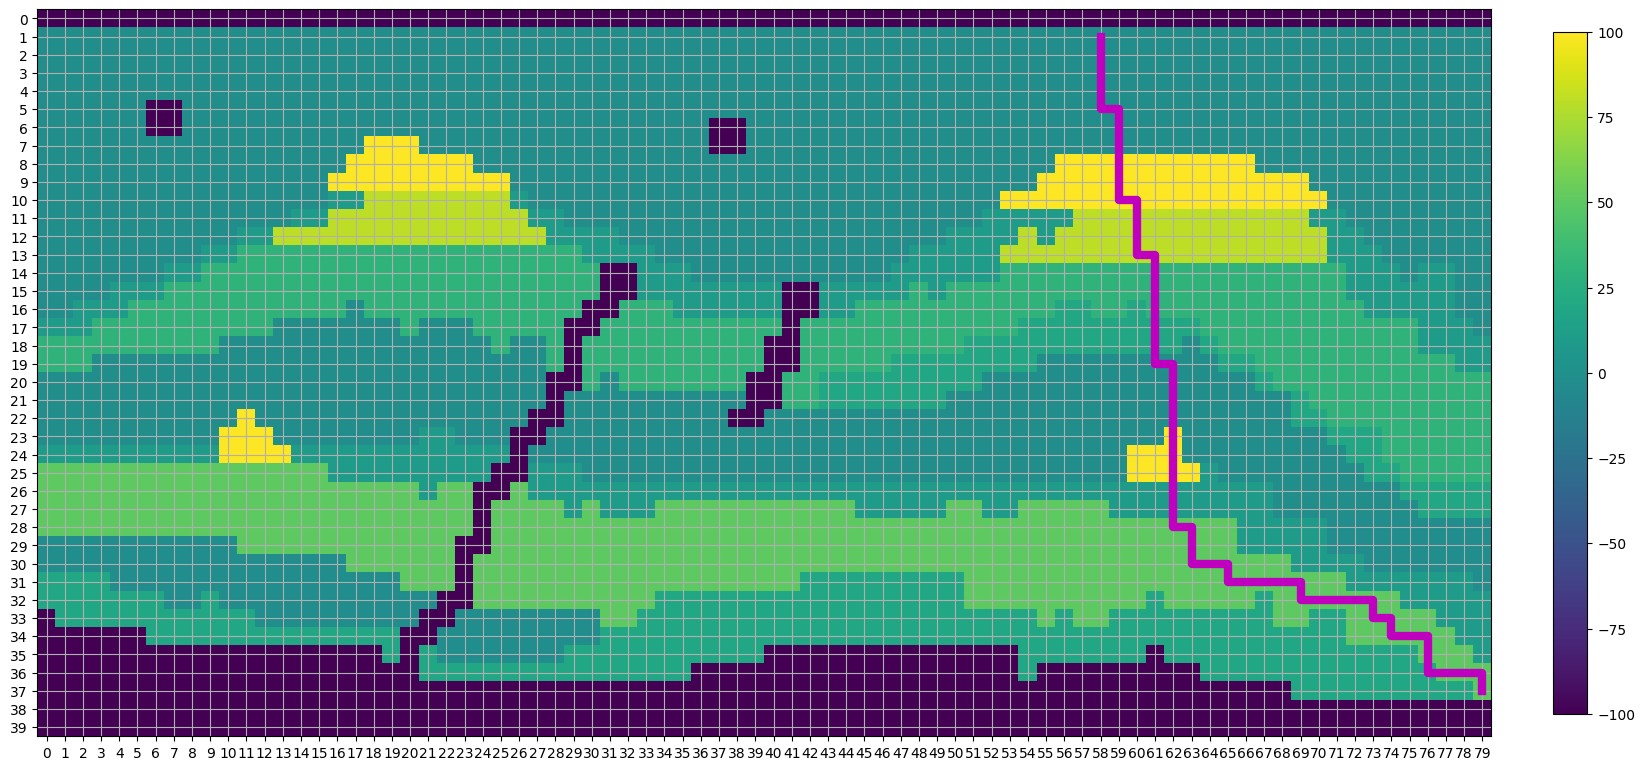

In [6]:
env = ModifiedDriller(env_config)

episodes = 41 # 1

max_score = -99999

for episode in range(1, episodes + 1):
    
    if ( episode  % (episodes/2) == 0):
        print("Beginning Drill Campaign:", episode)
    
    
    state = env.reset()
    done = False
    score = 0

    while not done:
        action, _states = model.predict(state)
        state, reward, done, info = env.step(action)
        score += reward


    if (score > max_score):
        max_score = score 
        #max_env = env 
        max_state = state
        max_trajectory = env.trajectory
        
        
# This comes in as [[row1, col1], ..., [rowN, colN]]
# Once we unpack it its z, then x.

#traj_z, traj_x = np.asarray(env.trajectory).T

traj_z1, traj_x1 = np.asarray(max_trajectory).T

plt.figure(figsize=(20, 20))

#  plt.imshow(env.model, vmin=-10, vmax=2)
# im=plt.imshow(env.model, vmin=-10, vmax=2)
im=plt.imshow(env.model , vmin=-100, vmax=100)


plt.plot(traj_x1[:-1], traj_z1[:-1], "-", c="m", linewidth=6)
#plt.imshow(max_state)

plt.xticks(np.arange(0, 80, 1.0))
plt.yticks(np.arange(0, 40, 1.0))
plt.xlim([-0.5, 79.5])
plt.ylim([39.5, -0.5])

plt.colorbar(im, fraction=0.022, pad=0.04)

plt.grid()

print('score', max_score)
print('drill bit finish location reward', reward)

#### Save the trajectory for well A

In [14]:
np.savetxt('wellA.csv', np.asarray(max_trajectory), delimiter=",", fmt='%i'  )

## Visualize State

As we mentioned before, the state is binary (boolean) well trajectory. If we wanted to plot it, we get the `state` attribute and use `imshow`.

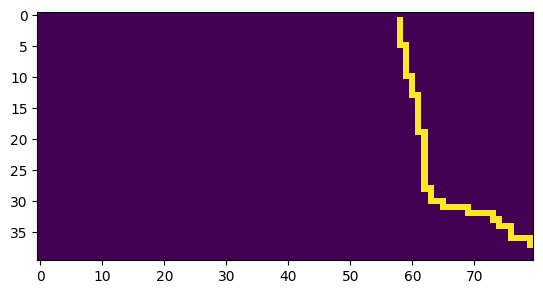

In [15]:
plt.imshow(max_state)

# The second production well B


### Initialization for the borehole surface location for the well B

In [16]:
# set up the surface wellbore X range for the 2nd well
ncol = earth_model.shape[1]

if ( traj_x1[0] < ncol and traj_x1[0] > int (ncol / 2) ):
    
    wellB_x_start = 0

    wellB_x_end = int(ncol/2) -1 

else : 
    
    wellB_x_start = int( ncol / 2 )
    
    wellB_x_end = ncol - 1 

#### Set the environment for drilling the 2nd productoin well B and train the model

In [17]:
# a new 'env' with existing well path from the first well 



# drilling budge (in thousand US Dollars) 
drill_budget = 950  # 0.95 million dollars for second well  

prod = 1   # production;  pressure depletion mechanism, cost model changes accordingly  

env_config = dict(model_path=r"data/2d_stacked_modify6.csv",\
                  exist_well_path=r"wellA.csv",\
                  available_pipe=npipe, \
                  available_budget = drill_budget, \
                  production= prod, \
                  surf_x_start= wellB_x_start , \
                  surf_x_end=  wellB_x_end, \
                  delim=",")


#exist_well_path = np.loadtxt(
#                env_config["exist_well_path"],
#                delimiter=env_config["delim"],
#                )



env = ModifiedDriller(env_config)


# now train with existing well path constraint 

model = PPO("MlpPolicy", env, verbose=1 ) 


ntimesteps = 100000 # 300000    

now = datetime.now()
print('\ntime stamp, before training:', now)

model.learn(total_timesteps= ntimesteps, log_interval=10)  

now = datetime.now()
print('\ntime stamp, after training:', now)

Exist_well_path first points:
 [[1.0, 58.0]]
Exist_well_path last points:
 [[37.0, 80.0]]

available piples: 60 


available budget: 950

user input, surf_x_start:  0
user input, surf_x_end:  39

within earth model, surf_x_start:  0
within earth model, surf_x_end:  39


self.production : 1 
self.cost_model[:, 2]:  [16.  16.  16.  16.  16.  16.  16.  16.  16.  16.  16.  16.  16.  16.5
 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.9 16.9
 16.9 16.9 16.9 16.9 16.9 16.9 16.9 16.9 16.9 16.9 16.9 16.9]
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.

time stamp, before training: 2022-09-06 14:00:23.195476
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 17.4         |
|    ep_rew_mean          | 107          |
| time/                   |              |
|    fps                  | 1846         |
|    iterations           | 10           |
|    time_elapsed         | 

In [18]:
# save the model for the 2nd well B

model.save("model_for_wellB")

###  Find the path for the 2nd production well B using the trained model "model_for_wellB"

Exist_well_path first points:
 [[1.0, 58.0]]
Exist_well_path last points:
 [[37.0, 80.0]]

available piples: 60 


available budget: 950

user input, surf_x_start:  0
user input, surf_x_end:  39

within earth model, surf_x_start:  0
within earth model, surf_x_end:  39


self.production : 1 
self.cost_model[:, 2]:  [16.  16.  16.  16.  16.  16.  16.  16.  16.  16.  16.  16.  16.  16.5
 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.9 16.9
 16.9 16.9 16.9 16.9 16.9 16.9 16.9 16.9 16.9 16.9 16.9 16.9]
Beginning Drill Campaign: 21
score 745.0
drill bit finish location reward -100


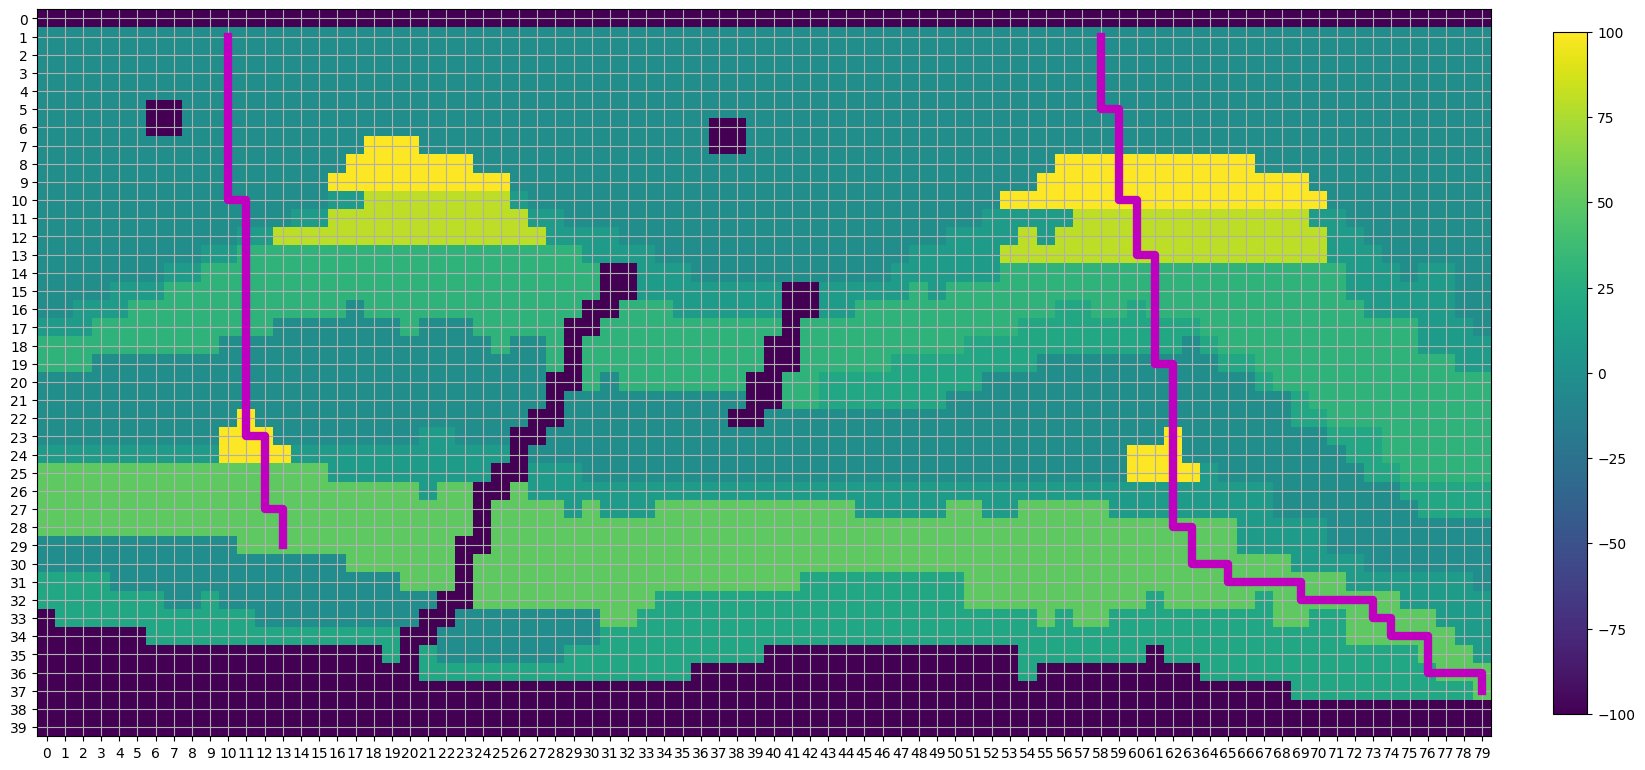

In [21]:
env = ModifiedDriller(env_config)

episodes = 21 #18 #188 # 1

max_score = -99999

for episode in range(1, episodes + 1):
    
    if ( episode  % (episodes/2) == 0):
        print("Beginning Drill Campaign:", episode)
    
    
    state = env.reset()
    done = False
    score = 0

    while not done:
        action, _states = model.predict(state)
        state, reward, done, info = env.step(action)
        score += reward


    if (score > max_score):
        max_score = score 
        #max_env = env 
        max_state = state
        max_trajectory = env.trajectory
        
        

traj_z, traj_x = np.asarray(max_trajectory).T

plt.figure(figsize=(20, 20))

im=plt.imshow(env.model , vmin=-100, vmax=100)


plt.plot(traj_x[:-1], traj_z[:-1], "-", c="m", linewidth=6)

plt.plot(traj_x1[:-1], traj_z1[:-1], "-", c="m", linewidth=6)


plt.xticks(np.arange(0, 80, 1.0))
plt.yticks(np.arange(0, 40, 1.0))
plt.xlim([-0.5, 79.5])
plt.ylim([39.5, -0.5])

plt.colorbar(im, fraction=0.022, pad=0.04)

plt.grid()

print('score', max_score)
print('drill bit finish location reward', reward)

In [22]:
np.savetxt('wellB.csv', np.asarray(max_trajectory), delimiter=",", fmt='%i'  )

## Injector Well 

###  due to production and pressure depletion, 
###  need to drill injector well to provide pressure support for efficient production 

###  we built another model model for injector well for pressure support
###  which is different from the previous earth model 


In [23]:
# load existing two well paths  

exist_wellA_path = (np.loadtxt(
                'wellA.csv' ,
                delimiter=",",
                ) )    

#print(exist_wellA_path)



exist_wellB_path = (np.loadtxt(
                'wellB.csv' ,
                delimiter=",",
                ) )    

# for plot later
traj_z1, traj_x1 = np.asarray( exist_wellA_path ).T

traj_z2, traj_x2 = np.asarray( exist_wellB_path ).T


# well paths of existing wells 
# injector well should not collide with already exist wells 

a = exist_wellA_path.tolist()

b = exist_wellB_path.tolist()
 

a.extend( b )  # can also directly use np stack ... 

#
arr = np.array( a )


# injector well should avoid collision with exist well paths 
np.savetxt('wellA_and_B_path.csv', np.asarray(arr), delimiter=",", fmt='%i'  )


## Injector Well model training 

#### create the 3rd environment for injector well 

In [24]:
# another new 'env' with existing well paths from the first and second wells

from wildcatter.environment_modify_multiW_surfaceXrange3 import ModifiedDriller

npipe = 58 

# drilling budge (in thousand US Dollars) 
drill_budget = 980  # budget for injector well  

prod = 1   # production;  pressure depletion mechanism, cost model changes accordingly  

env_config = dict(model_path=r"data/2d_stacked_pressure_depl4.csv",\
                  exist_well_path=r"wellA_and_B_path.csv",\
                  available_pipe=npipe, \
                  available_budget = drill_budget, \
                  production= prod, \
                  surf_x_start= 40 , \
                  surf_x_end=  78, \
                  delim=",")


#exist_well_path = np.loadtxt(
#                env_config["exist_well_path"],
#                delimiter=env_config["delim"],
#                )



env = ModifiedDriller(env_config)


# now train with existing well path constraint 

model = PPO("MlpPolicy", env, verbose=1 ) 


ntimesteps = 100000 # 150000    

now = datetime.now()
print('\ntime stamp, before training:', now)

model.learn(total_timesteps= ntimesteps, log_interval=10)  

now = datetime.now()
print('\ntime stamp, after training:', now)

Exist_well_path first points:
 [[1.0, 58.0]]
Exist_well_path last points:
 [[29.0, 12.0]]

available piples: 58 


available budget: 980

user input, surf_x_start:  40
user input, surf_x_end:  78

within earth model, surf_x_start:  40
within earth model, surf_x_end:  78


self.production : 1 
self.cost_model[:, 2]:  [16.  16.  16.  16.  16.  16.  16.  16.  16.  16.  16.  16.  16.  16.5
 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.9 16.9
 16.9 16.9 16.9 16.9 16.9 16.9 16.9 16.9 16.9 16.9 16.9 16.9]
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.

time stamp, before training: 2022-09-06 14:08:36.295028
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 18.9        |
|    ep_rew_mean          | -19.6       |
| time/                   |             |
|    fps                  | 1874        |
|    iterations           | 10          |
|    time_elapsed         | 10   

In [25]:
model.save("model_for_well_A_B")

### further optimize for injector well path 


#### plot on earth model where values represent appropriateness for injector well 

#### reward system design for injector well drilling : injector well should not directly drill on the oil to interfere with production , instead should drill a little bit away from it , to provide pressure support 

Exist_well_path first points:
 [[1.0, 58.0]]
Exist_well_path last points:
 [[29.0, 12.0]]

available piples: 58 


available budget: 980

user input, surf_x_start:  40
user input, surf_x_end:  78

within earth model, surf_x_start:  40
within earth model, surf_x_end:  78


self.production : 1 
self.cost_model[:, 2]:  [16.  16.  16.  16.  16.  16.  16.  16.  16.  16.  16.  16.  16.  16.5
 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.9 16.9
 16.9 16.9 16.9 16.9 16.9 16.9 16.9 16.9 16.9 16.9 16.9 16.9]
Beginning Drill Campaign: 18
Beginning Drill Campaign: 36
score 331.0
drill bit finish location reward -100


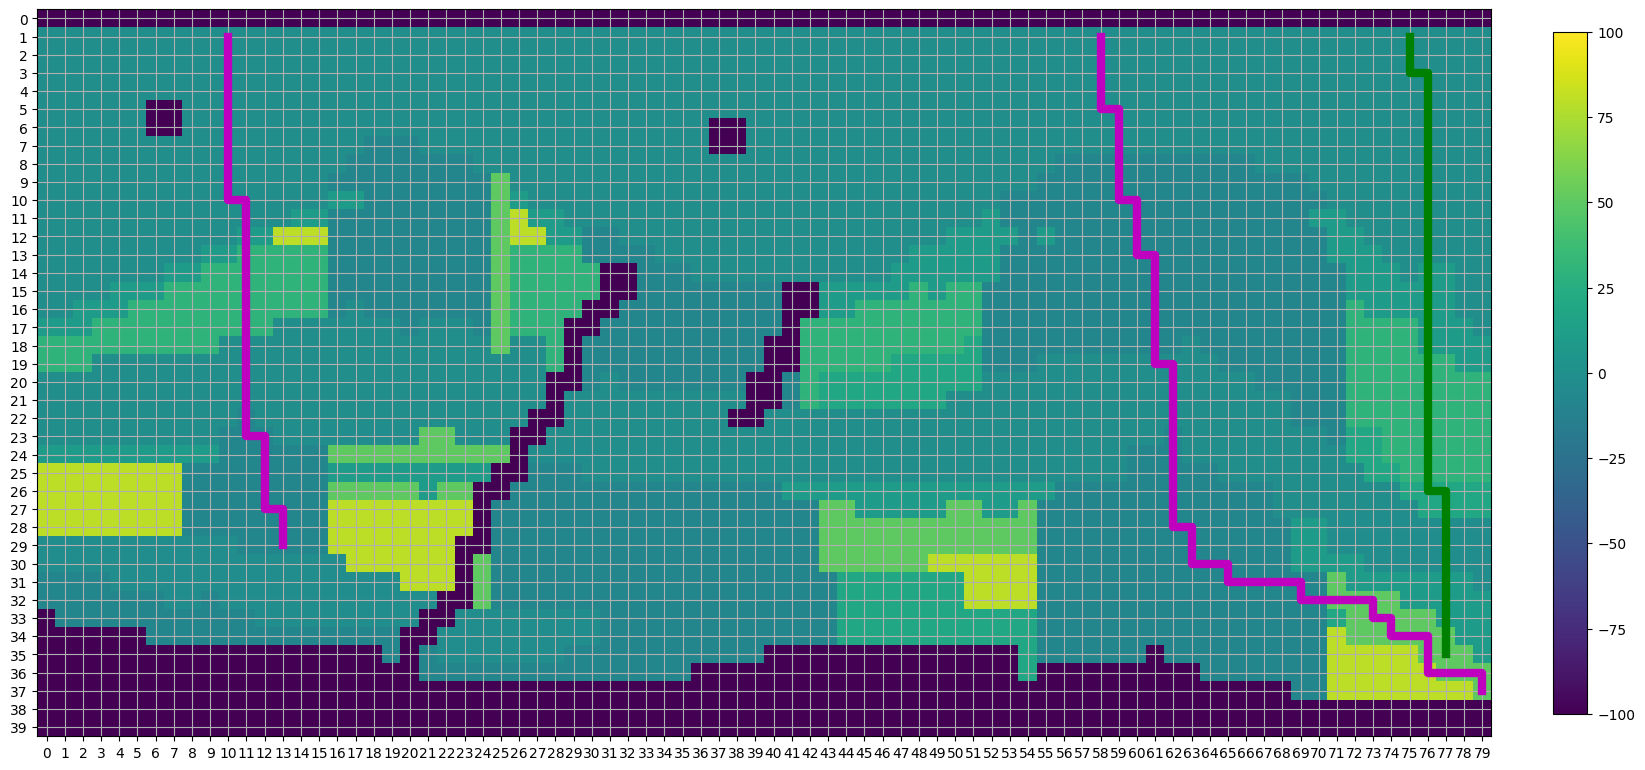

In [29]:
env = ModifiedDriller(env_config)

episodes = 36 #18 #188 # 1

max_score = -99999

for episode in range(1, episodes + 1):
    
    if ( episode  % (episodes/2) == 0):
        print("Beginning Drill Campaign:", episode)
    
    
    state = env.reset()
    done = False
    score = 0

    while not done:
        action, _states = model.predict(state)
        state, reward, done, info = env.step(action)
        score += reward


    if (score > max_score):
        max_score = score 
        #max_env = env 
        max_state = state
        max_trajectory = env.trajectory
        
        

traj_z, traj_x = np.asarray(max_trajectory).T

plt.figure(figsize=(20, 20))

im=plt.imshow(env.model , vmin=-100, vmax=100)


plt.plot(traj_x[:-1], traj_z[:-1], "-", c="g", linewidth=6)

plt.plot(traj_x1[:-1], traj_z1[:-1], "-", c="m", linewidth=6)

plt.plot(traj_x2[:-1], traj_z2[:-1], "-", c="m", linewidth=6)


plt.xticks(np.arange(0, 80, 1.0))
plt.yticks(np.arange(0, 40, 1.0))
plt.xlim([-0.5, 79.5])
plt.ylim([39.5, -0.5])

plt.colorbar(im, fraction=0.022, pad=0.04)

plt.grid()

print('score', max_score)
print('drill bit finish location reward', reward)

In [30]:
np.savetxt('wellInjector.csv', np.asarray(max_trajectory), delimiter=",", fmt='%i'  )

#### plot on earth model where oil, gas are shown in model 

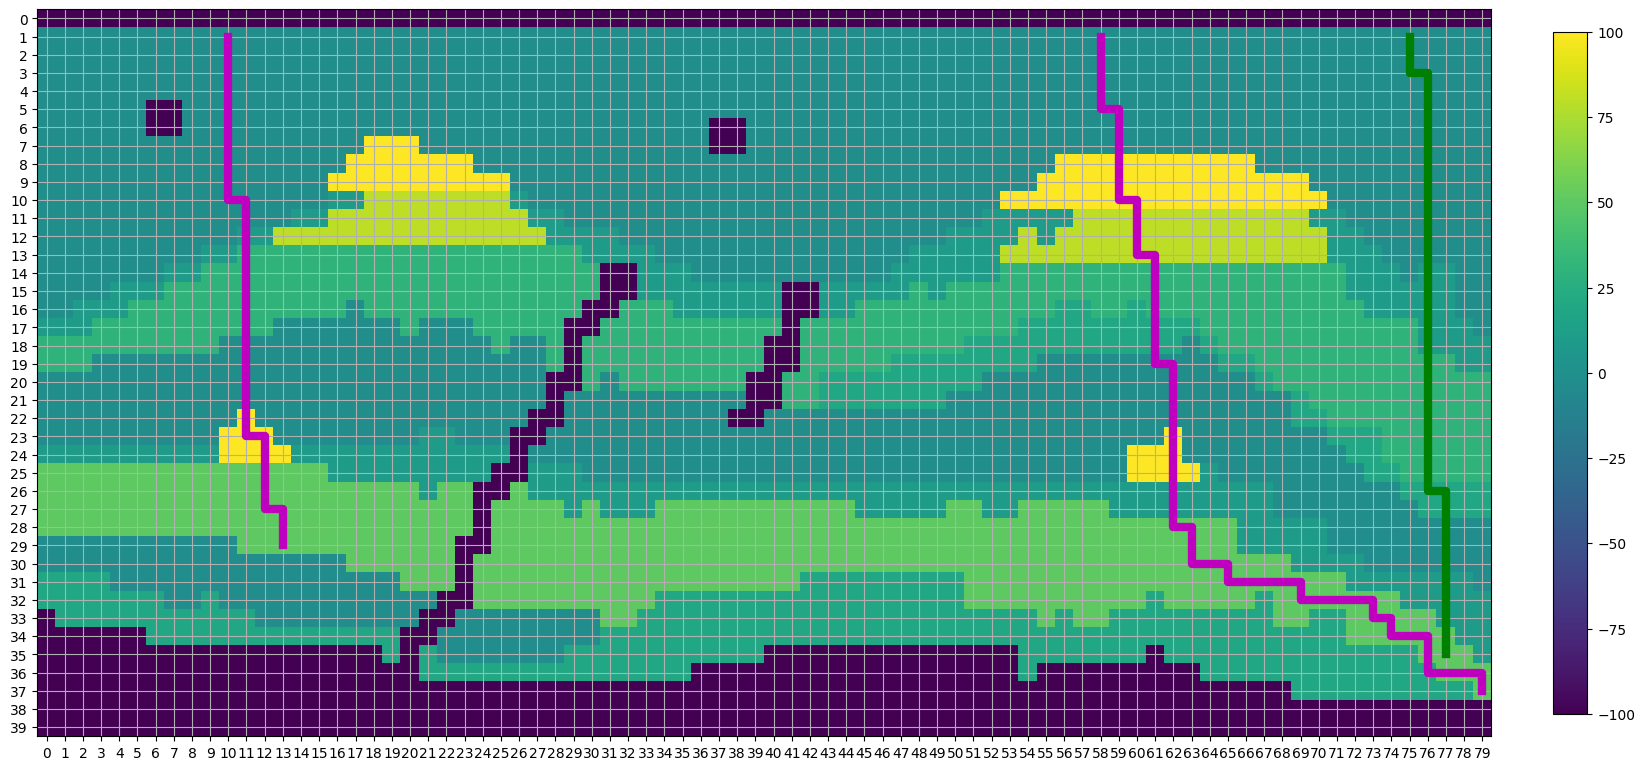

In [31]:

plt.figure(figsize=(20, 20))


earth_model0 = np.loadtxt(
             "data/2d_stacked_modify6.csv",
            delimiter=",",
        )

im=plt.imshow( earth_model0 , vmin=-100, vmax=100)


plt.plot(traj_x[:-1], traj_z[:-1], "-", c="g", linewidth=6)

plt.plot(traj_x1[:-1], traj_z1[:-1], "-", c="m", linewidth=6)

plt.plot(traj_x2[:-1], traj_z2[:-1], "-", c="m", linewidth=6)


plt.xticks(np.arange(0, 80, 1.0))
plt.yticks(np.arange(0, 40, 1.0))
plt.xlim([-0.5, 79.5])
plt.ylim([39.5, -0.5])

plt.colorbar(im, fraction=0.022, pad=0.04)

plt.grid()


# Conclusions

We trained a driller to maximize reward based on traversing the "earth model", taking into account factors including geological and economic constraints.
